In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import keras
from sklearn.preprocessing import OneHotEncoder

# Checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Cleaning training data
df_train = pd.read_csv('../data/training_data.csv')
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')

X_train = df_train.iloc[:, 0:-1].values
Y_train = df_train.iloc[:, -1].values.reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
Y_train = enc.fit_transform(Y_train).toarray()

# Cleaning test data
df_test = pd.read_csv('../data/testing_data.csv')
df_test = df_test.drop(['Unnamed: 0'], axis=1)
df_test.columns = df_test.columns.str.lower().str.replace(' ', '_')

X_test = df_test.iloc[:, 0:-1].values
Y_test = df_test.iloc[:, -1].values.reshape(-1,1)
Y_test = enc.transform(Y_test).toarray()

In [3]:
Y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [4]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(64, 33) (64, 4)
(16, 33) (16, 4)


In [5]:
# Neural Network
inputs = keras.Input(shape=(33))
dense_1 = keras.layers.Dense(33, activation='relu')(inputs)
dense_2 = keras.layers.Dense(20, activation='relu')(dense_1)
dense_3 = keras.layers.Dense(10, activation='relu')(dense_2)
outputs = keras.layers.Dense(4, activation='softmax')(dense_3)

2022-10-14 11:42:19.856022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 11:42:19.863724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 11:42:19.864125: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-14 11:42:19.864932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [6]:
model = keras.Model(inputs=inputs, outputs=outputs, name="dense_model")

In [7]:
model.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 33)]              0         
                                                                 
 dense (Dense)               (None, 33)                1122      
                                                                 
 dense_1 (Dense)             (None, 20)                680       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
Total params: 2,056
Trainable params: 2,056
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Model Checkpoint
checkpoint = ModelCheckpoint(
    'checkpoints/dense_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True, 
    monitor='val_accuracy', 
    mode='max')

In [9]:
# Loss
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

# Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [10]:
# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [11]:
# Train model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    batch_size=4, epochs=16, callbacks=[checkpoint])

Epoch 1/16


/home/manuel/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


16/16 [==============================] - 1s 14ms/step - loss: 1.2913 - accuracy: 0.2500 - val_loss: 1.2444 - val_accuracy: 0.3750
Epoch 2/16
16/16 [==============================] - 0s 3ms/step - loss: 1.1924 - accuracy: 0.3750 - val_loss: 1.1660 - val_accuracy: 0.3750
Epoch 3/16
16/16 [==============================] - 0s 4ms/step - loss: 1.1029 - accuracy: 0.6094 - val_loss: 1.0798 - val_accuracy: 0.4375
Epoch 4/16
16/16 [==============================] - 0s 5ms/step - loss: 1.0056 - accuracy: 0.6406 - val_loss: 0.9842 - val_accuracy: 0.6250
Epoch 5/16
16/16 [==============================] - 0s 5ms/step - loss: 0.9076 - accuracy: 0.6719 - val_loss: 0.8949 - val_accuracy: 0.6875
Epoch 6/16
16/16 [==============================] - 0s 4ms/step - loss: 0.7961 - accuracy: 0.6875 - val_loss: 0.7760 - val_accuracy: 0.6875
Epoch 7/16
16/16 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.7344 - val_loss: 0.6659 - val_accuracy: 0.6875
Epoch 8/16
16/16 [============

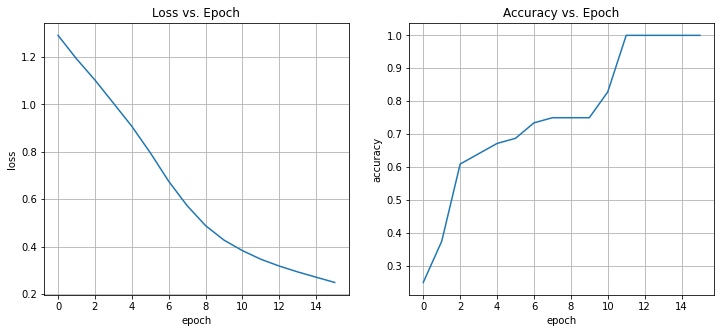

In [12]:
# Results
plt.rcParams['figure.figsize'] =(12,5)

plt.subplot(1,2,1)
plt.title('Loss vs. Epoch')
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid('on')

plt.subplot(1,2,2)
plt.title('Accuracy vs. Epoch')
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid('on')

In [13]:
test_scores = model.evaluate(X_test, Y_test)
print(f'Test loss: {test_scores[0]}')
print(f'Test accuracy: {test_scores[1]}')

1/1 [==============================] - 0s 108ms/step - loss: 0.3169 - accuracy: 0.9375
Test loss: 0.31688424944877625
Test accuracy: 0.9375


In [15]:
# Pickle the encoder
with open('checkpoints/encoder.pkl', 'wb') as file:
    pickle.dump(enc, file)